In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data_Based_country_and_race.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
df.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [5]:
df.shape

(6704, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [8]:
df.isnull()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6699,False,False,False,False,False,False,False,False,False
6700,False,False,False,False,False,False,False,False,False
6701,False,False,False,False,False,False,False,False,False
6702,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().value_counts()

Unnamed: 0  Age    Gender  Education Level  Job Title  Years of Experience  Salary  Country  Race 
False       False  False   False            False      False                False   False    False    6698
                                                                            True    False    False       2
            True   True    True             True       True                 True    False    False       2
            False  False   False            False      True                 True    False    False       1
                           True             False      False                False   False    False       1
Name: count, dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

**here,we are dropna all the nul value from the datset**

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [13]:
df.nunique()

Unnamed: 0             6698
Age                      41
Gender                    3
Education Level           7
Job Title               191
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [15]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [17]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [18]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [19]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [20]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

In [21]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


In [22]:
df['Race'].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [23]:
df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

## Data Visulization

**Pie Chart For Gender**

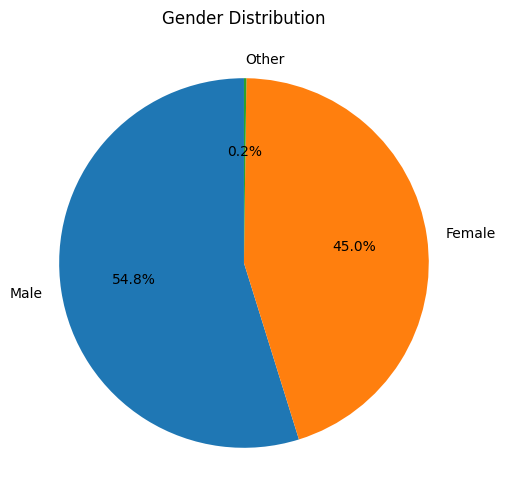

In [24]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

**Histogram for Age**

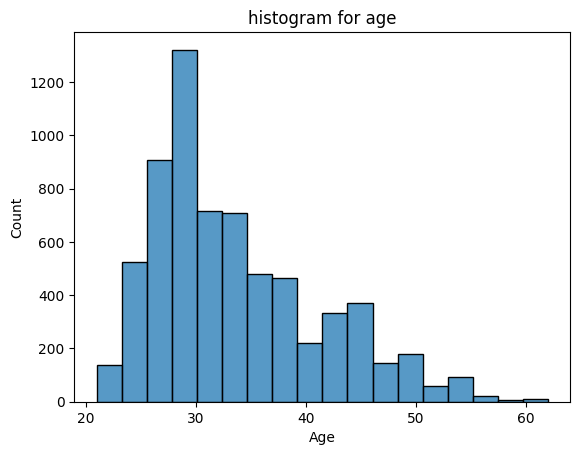

In [25]:
sns.histplot(data=df,x='Age',bins=18)
plt.title("histogram for age")
plt.show()

**Education Level**

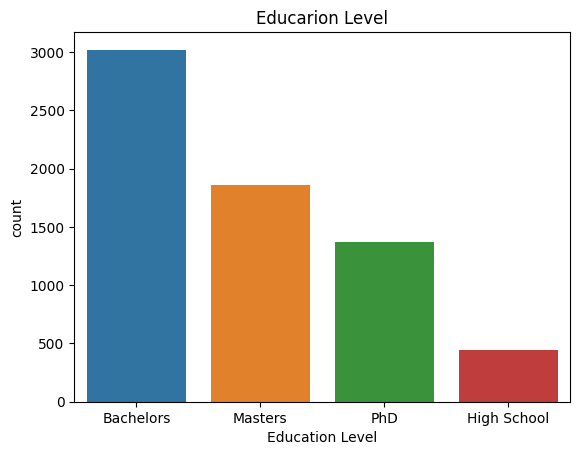

In [26]:
sns.countplot(x='Education Level',data=df)
plt.title("Educarion Level")
plt.show()

**Job Title**

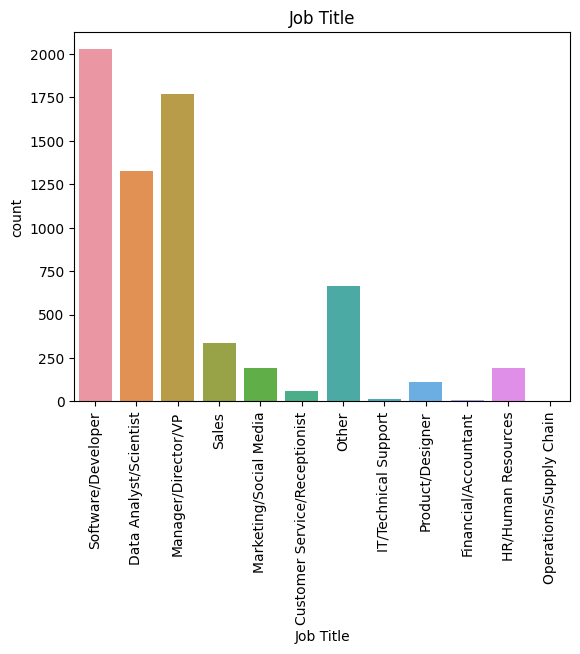

In [27]:
sns.countplot(x='Job Title',data=df)
plt.xticks(rotation=90) # it wil rotate the xaxis at 90 degree
plt.title("Job Title")
plt.show()

**Year Experiance**

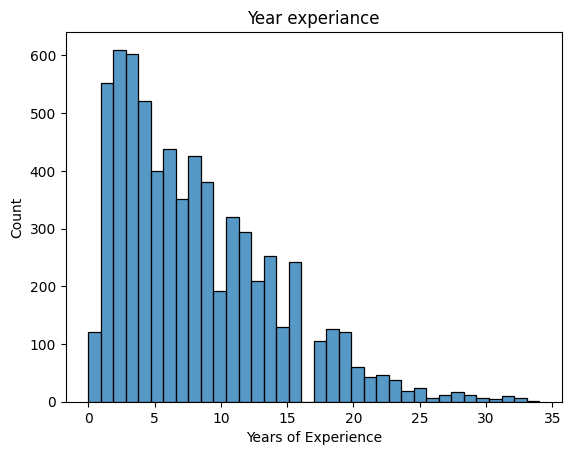

In [28]:
sns.histplot(x='Years of Experience',data=df)
plt.title("Year experiance")
plt.show()

**Country**

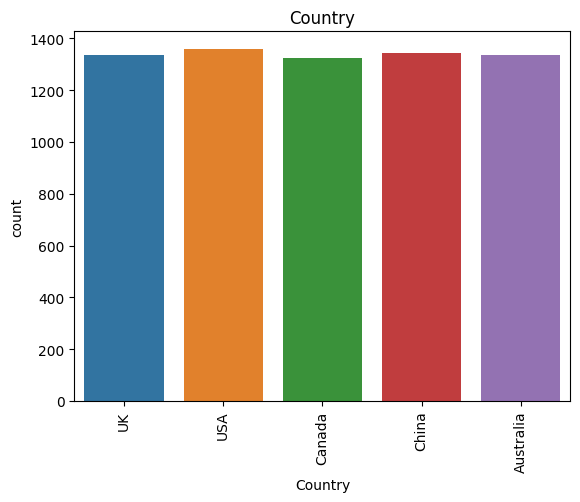

In [29]:
sns.countplot(x='Country',data=df)
plt.xticks(rotation=90)
plt.title("Country")
plt.show()

**Race**

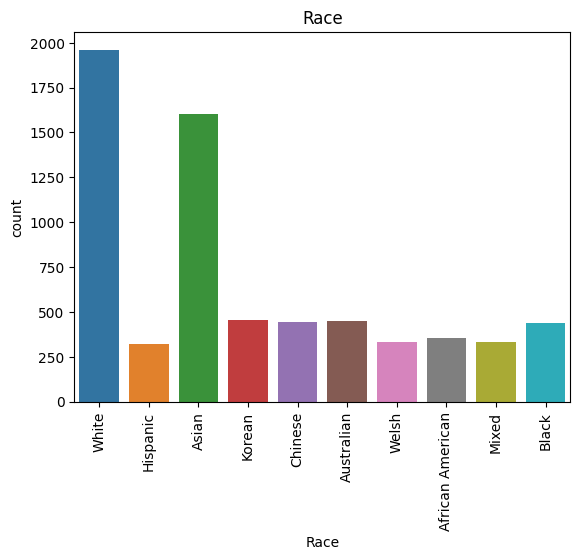

In [30]:
sns.countplot(x="Race",data=df)
plt.xticks(rotation=90)
plt.title("Race")
plt.show()

**Salary**

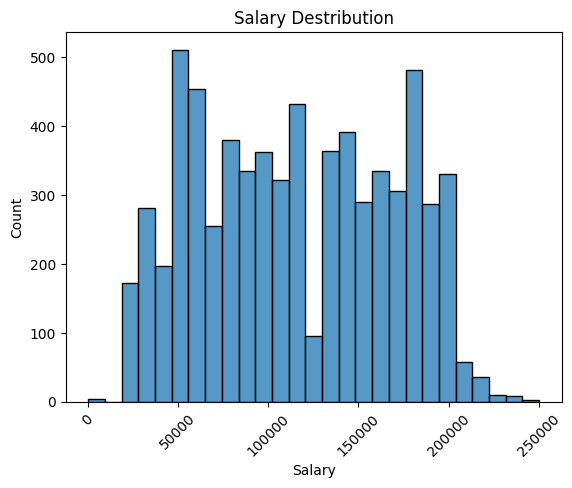

In [31]:
sns.histplot(x="Salary",data=df)
plt.xticks(rotation=45)
plt.title("Salary Destribution")
plt.show()

**Age & Salary**

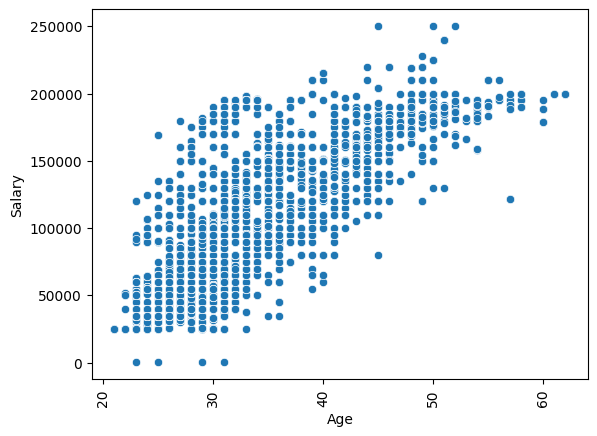

In [32]:
sns.scatterplot(x='Age',y='Salary',data=df)
plt.xticks(rotation=90)
plt.show()

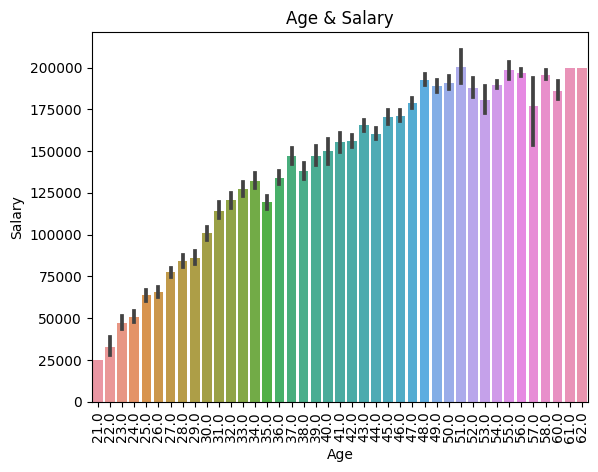

In [33]:
sns.barplot(x='Age',y='Salary',data=df)
plt.xticks(rotation=90)
plt.title("Age & Salary")
plt.show()

**Years of Experience & Salary**

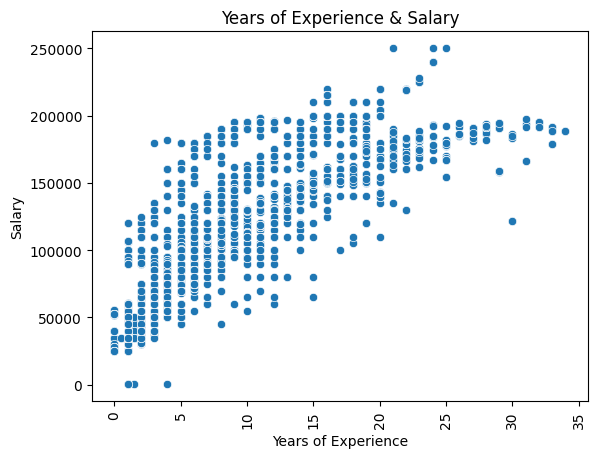

In [34]:
sns.scatterplot(x='Years of Experience',y="Salary",data=df)
plt.xticks(rotation=90)
plt.title("Years of Experience & Salary")
plt.show()

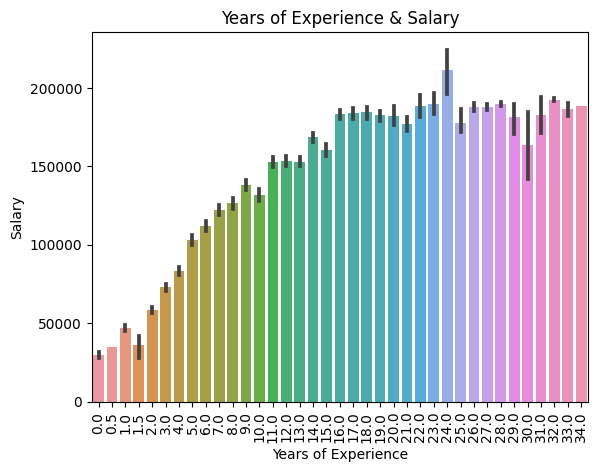

In [35]:
sns.barplot(x='Years of Experience',y="Salary",data=df)
plt.xticks(rotation=90)
plt.title("Years of Experience & Salary")
plt.show()

**Job Title & Salary**

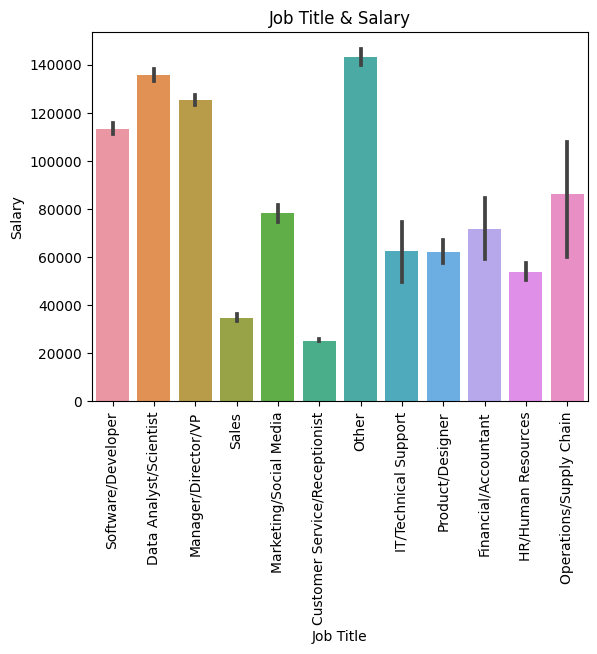

In [36]:
sns.barplot(x='Job Title',y="Salary",data=df)
plt.xticks(rotation=90)
plt.title("Job Title & Salary")
plt.show()

## Labelencoding 

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()
e= ['Gender','Country','Education Level','Job Title', 'Race']
for i in e:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


In [39]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,0,11,5.0,90000.0,3,9
1,28.0,0,2,1,3.0,65000.0,4,5
2,45.0,1,3,5,15.0,150000.0,1,9
3,36.0,0,0,10,7.0,60000.0,4,5
4,52.0,1,2,5,20.0,200000.0,4,1


**Normalization**

In [40]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

**Coorelation heatmap**

<Axes: >

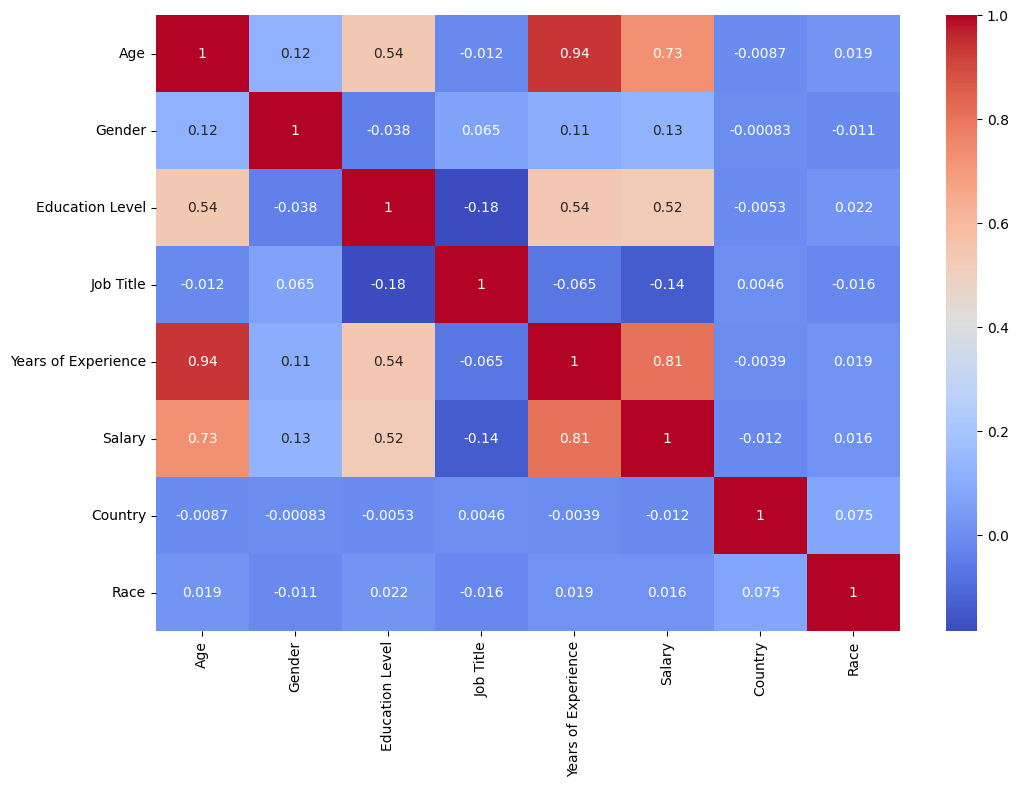

In [75]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

**Data Spliting**

In [42]:
x=df.drop(['Salary'],axis=1)

In [43]:
y=df['Salary']

In [44]:
x

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,-0.213129,1,0,11,-0.510769,3,9
1,-0.738393,0,2,1,-0.840811,4,5
2,1.493980,1,3,5,1.139440,1,9
3,0.312135,0,0,10,-0.180727,4,5
4,2.413192,1,2,5,1.964544,4,1
...,...,...,...,...,...,...,...
6699,2.019244,0,3,5,1.964544,3,7
6700,-0.213129,1,1,10,-0.840811,0,2
6701,-0.475761,0,0,5,-0.675790,2,4
6702,1.625296,1,2,5,0.974419,2,6


In [45]:
y

0      -0.479849
1      -0.953461
2       0.656819
3      -1.048183
4       1.604042
          ...   
6699    1.604042
6700   -1.237628
6701   -1.142906
6702    0.467374
6703   -1.521795
Name: Salary, Length: 6698, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
3426,0.706084,1,2,3,0.314335,4,1
1552,0.574767,0,2,11,0.314335,3,1
6021,0.180819,0,3,5,0.644377,1,3
4461,-0.475761,0,1,10,-1.170853,3,7
3286,-1.394973,0,0,11,-1.170853,0,2
...,...,...,...,...,...,...,...
3776,-0.607077,1,0,11,-0.675790,1,9
5195,0.574767,0,2,5,0.974419,0,9
5230,-1.132341,1,0,11,-1.170853,2,6
5395,-0.869709,1,0,11,-1.170853,3,1


In [49]:
y_train

3426   -0.195682
1552    0.751541
6021    1.130431
4461   -1.711240
3286   -1.237628
          ...   
3776   -0.953461
5195    1.035708
5230   -1.142906
5395   -1.142906
862    -0.100960
Name: Salary, Length: 5358, dtype: float64

In [50]:
x_test

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1883,0.312135,1,2,11,0.149315,2,9
2630,-0.869709,0,2,11,-0.675790,0,9
498,-1.132341,0,2,1,-1.170853,2,6
5973,-0.738393,0,0,1,-0.840811,0,2
4108,-0.607077,1,0,11,-0.510769,0,1
...,...,...,...,...,...,...,...
2830,-1.001025,0,2,11,-0.840811,1,9
6154,-0.738393,0,0,1,-0.840811,3,9
4940,-0.738393,0,3,5,-0.345748,0,2
135,0.706084,0,0,8,0.314335,1,3


In [51]:
y_test

1883    0.656819
2630   -0.745659
498    -0.290405
5973   -1.048183
4108   -0.669294
          ...   
2830   -0.797775
6154   -0.953461
4940   -0.195682
135    -1.142906
3688   -1.048183
Name: Salary, Length: 1340, dtype: float64

In [52]:
type(x_train)

pandas.core.frame.DataFrame

In [53]:
type(y_train)

pandas.core.series.Series

In [54]:
type(x_test)

pandas.core.frame.DataFrame

In [55]:
type(y_test)

pandas.core.series.Series

In [56]:
#y_train=y_train.to_frame()

In [57]:
#y_test=y_tets.to_frame()

## Model Selection

**LinerRegression**

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
lr.score(x_test,y_test)

0.686802687079209

In [62]:
lr1=lr.predict(x_test)

**Random Forest**

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor()

In [67]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
rf.score(x_test,y_test)

0.9482639907780396

**Decision Tree**

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt=DecisionTreeRegressor()

In [71]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
dt.score(x_test,y_test)

0.9256037307079544

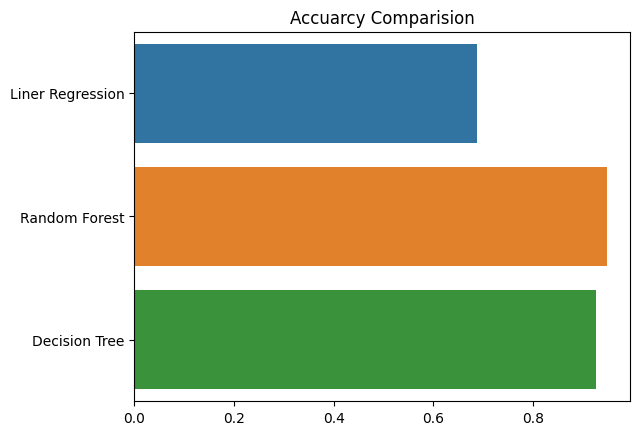

In [74]:
model=['Liner Regression','Random Forest','Decision Tree']
acc=[0.687,0.948,0.926]
sns.barplot(x=acc,y=model)
plt.title("Accuarcy Comparision")
plt.show()